## Iterative QPE
- This is a class implementing the iterative quantum phase estimation algorithm which uses a single ancillary qubit in our phase estimation procedure
- This is a generic class which is used to implement single as well as multi qubit phase estimation


In [1]:
from qiskit import *
from qiskit import transpile 
import numpy as np
import matplotlib.pyplot as plt
from qiskit.extensions import UnitaryGate
from qiskit import IBMQ 
import sys 
sys.path.append("..")
%matplotlib inline

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.3', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.13.1', 'qiskit-aqua': '0.9.1', 'qiskit': '0.26.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
from Modules.iterative_qpe import IQPE 

## Testing Circuit with phase 0.2
- Made a unitary with phase 0.2 to test the circuit
- 4 iterations were used to determine the final phase

In [4]:
U = UnitaryGate(data=np.array([[1, 0],
                               [0, np.exp(2*np.pi*1j*(1/5))]]))

In [5]:
iqpe = IQPE(precision=4,unitary=U,unknown=True) 

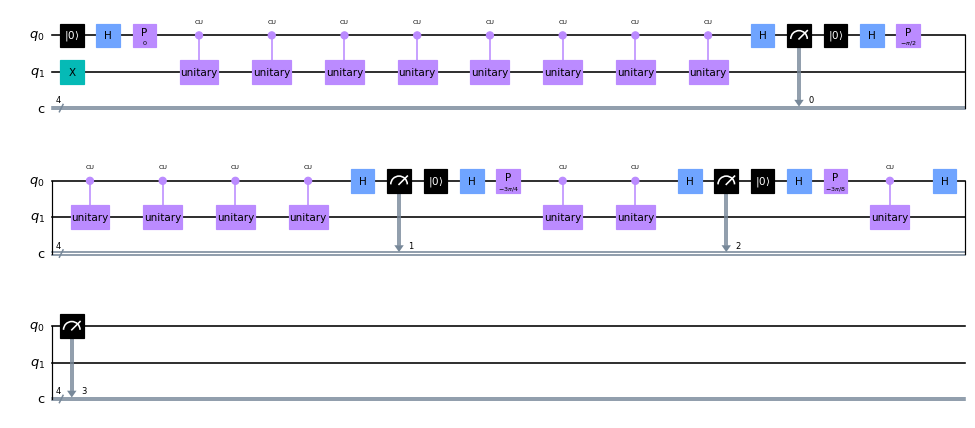

In [6]:
q = QuantumCircuit(2, 4)
q.x(1)
phase = iqpe.get_circuit_phase(
    QC=q, clbits=[0, 1, 2, 3], qubits=[1],ancilla=0, show=True, save_circ = True)

In [7]:
phase 

([0, 0, 1, 1], 0.1875)

## Testing with multi qubit unitary
- Made a unitary with a controlled application of Phase gate over the target qubit
- 7 iterations were used to determine this multiqubit phase(1/6) 

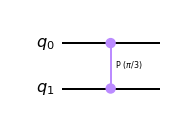

In [16]:
U = QuantumCircuit(2,name='U')
U.cp(2*np.pi*1/6,0,1)
U.draw('mpl')
#.control(num_ctrl_qcubits= 1, label = 'CCu', ctrl_state = '1')

In [17]:
iqpe = IQPE(precision=4,unitary=U,unknown=True) 

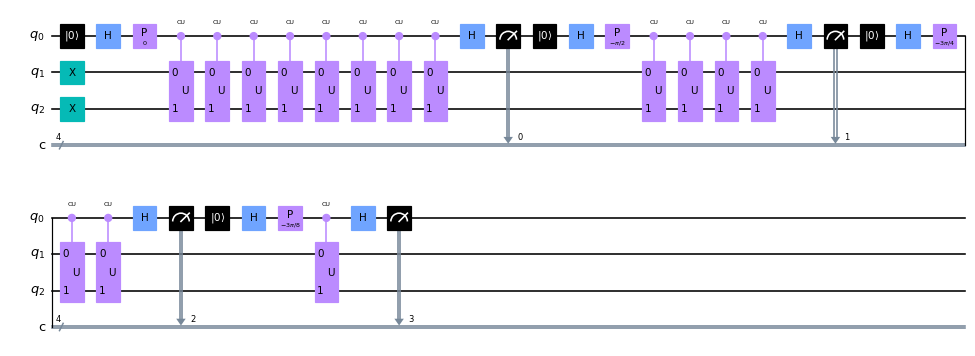

In [18]:
q = QuantumCircuit(3, 4)
q.x(1)
q.x(2)
phase = iqpe.get_circuit_phase(
    QC=q, clbits=[0, 1, 2, 3], qubits=[1,2],ancilla=0, show=True,save_circ = True,circ_name = "IQPE_circ.JPG")

In [19]:
print("Phase of the circuit in binary:", phase)


Phase of the circuit in binary: ([0, 0, 1, 1], 0.1875)


## Testing the circuit for increasing precision
- Using a 3 qubit matrix to test out the circuit 

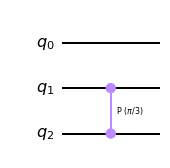

In [20]:
u2 = QuantumCircuit(3)
u2.cp(2*np.pi*(1/6),1,2)
u2.draw('mpl')

- The phase of this circuit would be **1/6** i.e. ~ **0.16667** given that the qubits are prepared in the eigenvector state which is **|110>** acc to qiskit notation

In [21]:
estimates = []
for prec in range(2, 9):
    q = QuantumCircuit(4, prec)
    # making eigenvector 
    q.x(2)
    q.x(3)
    iqpe = IQPE(precision=prec, unitary=u2,unknown=True)
    phase = iqpe.get_circuit_phase(
        QC=q, clbits=[i for i in range(prec)], qubits=[1,2,3], ancilla=0)
#     print(phase[0])
    estimates.append(phase[1])

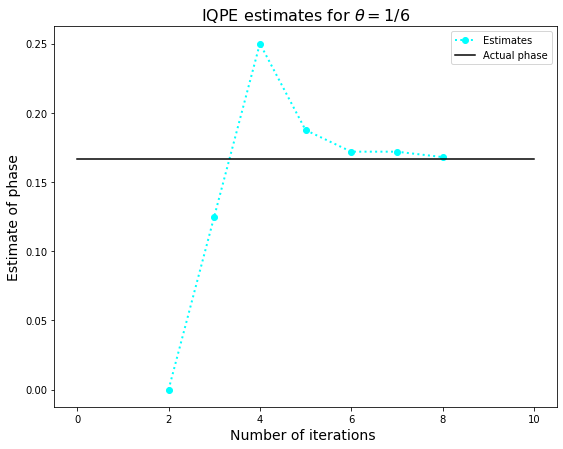

In [22]:
plt.figure(figsize=(9, 7))
plt.plot(list(range(2, 9)), estimates, marker='o',
         label='Estimates', linestyle='dotted',linewidth = 2,color = 'cyan')
plt.plot([0, 10], [0.16667, 0.16667], color='black', label='Actual phase')
plt.title("IQPE estimates for $\\theta = 1/6$", fontsize=16)
plt.xlabel("Number of iterations ", fontsize=14)
plt.ylabel("Estimate of phase", fontsize=14)
plt.legend()

### Making a generic Function
- This is a simple generic function used for making a plot of how the circuit converges to the phase for a given theta value for single qubit phase gates.
- Note that **unknown == True** is actually important for realizing the true simulation. 


In [29]:
from Modules.iterative_qpe import get_estimate_plot_phase 

- Testing for actual backend **ibmq-casablanca**

In [ ]:
IBMQ.load_account()
## provider = IBMQ.get_provider('''ENTER YOUR PROVIDER''')
casb = provider.get_backend('ibmq_casablanca')



ITERATION NUMBER 1 ...


Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 0 [1, 1]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 1 [0, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 2 [1, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 3 [1, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 4 [1, 0]
Decimal Phase : 0.45
Absolute Error : 0.16440000000000002
Percentage error : 31.37404580152672 %


ITERATION NUMBER 2 ...


Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 0 [1, 0, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 1 [1, 1, 1]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 2 [1, 0, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 3 [1, 1, 1]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 4 [1, 0, 0]
Decimal Phase : 0.65
Absolute Error : 0.1548
Percentage error : 29.541984732824424 %


ITERATION NUMBER 3 ...


Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 0 [1, 0, 0, 1]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 1 [1, 0, 0, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 2 [1, 0, 0, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 3 [1, 0, 0, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 4 [1, 0, 1, 0]
Decimal Phase : 0.5375
Absolute Error : 0.0423
Percentage error : 8.072519083969464 %


ITERATION NUMBER 4 ...


Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 0 [0, 0, 0, 0, 1]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 1 [1, 1, 0, 1, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 2 [0, 0, 0, 0, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 3 [0, 1, 0, 0, 1]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 4 [0, 1, 1, 1, 0]
Decimal Phase : 0.3125
Absolute Error : 0.3269
Percentage error : 62.385496183206115 %


ITERATION NUMBER 5 ...


Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 0 [0, 0, 0, 0, 1, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 1 [0, 0, 0, 0, 0, 1]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 2 [1, 1, 0, 0, 1, 1]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 3 [0, 0, 0, 0, 1, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 4 [1, 1, 1, 0, 0, 1]
Decimal Phase : 0.353125
Absolute Error : 0.42667400000000005
Percentage error : 81.42633587786261 %


ITERATION NUMBER 6 ...


Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 0 [1, 0, 1, 1, 1, 1, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 1 [0, 1, 1, 1, 0, 1, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 2 [0, 0, 0, 0, 1, 0, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 3 [0, 0, 0, 1, 0, 1, 1]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 4 [0, 0, 0, 0, 0, 0, 0]
Decimal Phase : 0.2609375
Absolute Error : 0.347212
Percentage error : 66.2618320610687 %


ITERATION NUMBER 7 ...


Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 0 [1, 1, 1, 1, 1, 0, 0, 1]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 1 [0, 0, 1, 1, 1, 1, 0, 1]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 2 [1, 1, 0, 0, 1, 1, 0, 1]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 3 [1, 1, 1, 0, 1, 1, 1, 0]
Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Job Status: job has successfully run


None

Binary Phase in experiment 4 [0, 0, 0, 0, 1, 0, 0, 0]
Decimal Phase : 0.59453125
Absolute Error : 0.38192000000000004
Percentage error : 72.88549618320612 %


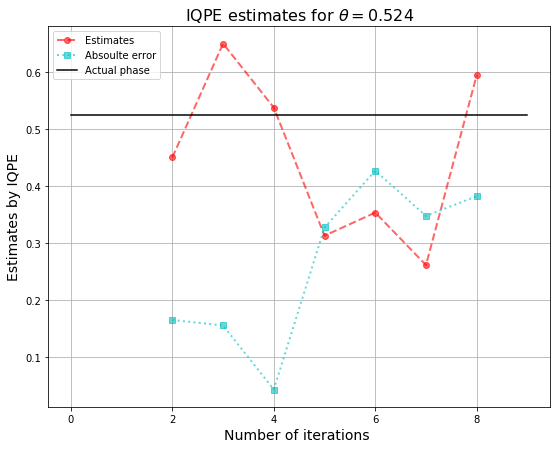

In [28]:
get_estimate_plot_phase(theta=0.524, iters = 9,unknown= True, save=True, experiments=5,backend=casb)

- Testing for simulator



ITERATION NUMBER 1 ...


Binary Phase in experiment 0 [0, 0]
Binary Phase in experiment 1 [0, 1]
Binary Phase in experiment 2 [0, 1]
Decimal Phase : 0.16666666666666666
Absolute Error : 0.12966666666666668
Percentage error : 116.81681681681684 %


ITERATION NUMBER 2 ...


Binary Phase in experiment 0 [0, 0, 1]
Binary Phase in experiment 1 [0, 0, 1]
Binary Phase in experiment 2 [0, 0, 1]
Decimal Phase : 0.125
Absolute Error : 0.014
Percentage error : 12.612612612612613 %


ITERATION NUMBER 3 ...


Binary Phase in experiment 0 [0, 0, 1, 0]
Binary Phase in experiment 1 [0, 0, 1, 0]
Binary Phase in experiment 2 [0, 0, 1, 0]
Decimal Phase : 0.125
Absolute Error : 0.014
Percentage error : 12.612612612612613 %


ITERATION NUMBER 4 ...


Binary Phase in experiment 0 [0, 0, 0, 1, 1]
Binary Phase in experiment 1 [0, 0, 0, 1, 1]
Binary Phase in experiment 2 [0, 0, 0, 1, 1]
Decimal Phase : 0.09375
Absolute Error : 0.01725
Percentage error : 15.54054054054054 %


ITERATION NUMBER 5 ...


Binary P

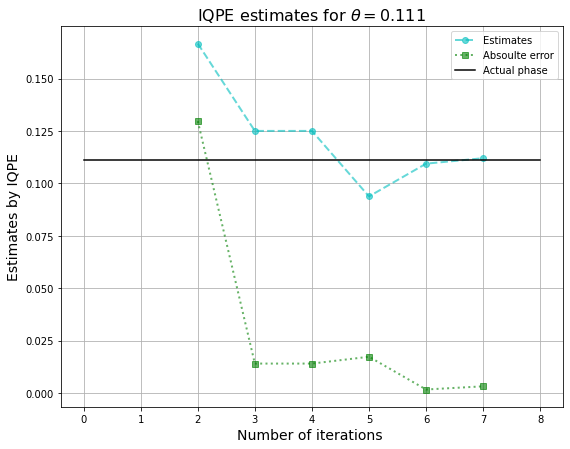

In [30]:
get_estimate_plot_phase(0.111, iters= 8, unknown=True, save=True,experiments=3)